In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

### Source: [Kaggle Pakistan's Largest E-Commerce Dataset](https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset)

The data used is data originating from Kaggle: Pakistan's Largest E-Commerce Dataset with some changes. The price listed has been converted to 1 Rupee equal to IDR 58. The explanation of the dataset is as follows:

**order_detail:**
|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
id          |object|    unique number of order / order_id
customer_id |object|    unique number of the customer
order_date  |object|    the date when the transaction was made
sku_id |object| unique number of the product (sku is stock keeping unit)
price |int64| the price stated on the price tag
qty_ordered |int64| the number of goods purchased by customers
before_discount |float64| total price value of the product (price * qty_ordered)
discount_amount |float64| total product discount value
after_discount |float64| the total price value of the product when it has been reduced by discounts
is_gross |int64| indicates the customer has not paid for the order
is_valid |int64| shows the customer has made a payment
is_net |int64| indicates the transaction is complete
payment_id |int64| unique number of the payment method


**sku_details:**
|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
id |object| unique number from the product (can be used as a key when joining)
sku_name |object| name of the product
base_price |float64| the price of the item stated on the price tag
cogs |int64| cost of goods sold / total cost to sell 1 product
category |object| product category


**customer_detail:**
|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
id |object| unique number of customers
registered_date |object| the date customers start registering as members


**payment_detail:**
|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
id |int64| unique number of the payment method
payment_method |object| payment method used

In [2]:
df_od = pd.read_csv("order_detail.csv")
df_pd = pd.read_csv("payment_detail.csv")
df_cd = pd.read_csv( "customer_detail.csv")
df_sd = pd.read_csv("sku_detail.csv")

In [3]:
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR8723933690j,C269125L,2021-01-07,P268025,113100,1,113100.0,0.0,113100.0,1,1,1,1
1,ODR4598875560c,C693630L,2021-01-07,P767128,13920,1,13920.0,0.0,13920.0,1,0,0,1
2,ODR8911603924d,C693630L,2021-11-25,P512707,15660,1,15660.0,0.0,15660.0,1,0,0,2
3,ODR9378341541o,C226141L,2021-01-07,P238882,142100,1,142100.0,0.0,142100.0,1,0,0,1
4,ODR1386982371d,C226141L,2022-05-19,P206879,30740,1,30740.0,0.0,30740.0,1,1,1,1


In [4]:
df_pd.head()

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [5]:
df_cd.head()

,id,registered_date
0,C269125L,2021-07-16
1,C693630L,2021-07-15
2,C226141L,2021-07-28
3,C996508L,2021-07-10
4,C180415L,2021-07-18


In [6]:
df_sd.head()

,id,sku_name,base_price,cogs,category
0,P576453,UnzeLondon_L24273-8,57855.0,42224,Women Fashion
1,P741727,amnaismail_AI KC 34-L,57855.0,39324,Women Fashion
2,P432347,amnaismail_AI KC 34-M,57855.0,44544,Women Fashion
3,P817533,amnaismail_AI KC 37-M,57855.0,35844,Women Fashion
4,P856172,amnaismail_AI KC 37-L,57855.0,35264,Women Fashion


### Data Cleaning Process

In [7]:
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

58013

In [8]:
df = pd.read_sql("""
SELECT 
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail 
LEFT JOIN payment_detail 
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [9]:
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR8723933690j,C269125L,2021-01-07,P268025,113100,1,113100.0,0.0,113100.0,1,1,1,1,cod,kreations_YI 06-L,113100.0,92742,Women Fashion,2021-07-16
1,ODR4598875560c,C693630L,2021-01-07,P767128,13920,1,13920.0,0.0,13920.0,1,0,0,1,cod,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,13920.0,10266,Beauty & Grooming,2021-07-15
2,ODR8911603924d,C693630L,2021-11-25,P512707,15660,1,15660.0,0.0,15660.0,1,0,0,2,jazzvoucher,RS_Habshi Halwa Tin,15660.0,12992,Soghaat,2021-07-15
3,ODR9378341541o,C226141L,2021-01-07,P238882,142100,1,142100.0,0.0,142100.0,1,0,0,1,cod,Ego_UP0017-999-MR0,142100.0,85260,Women Fashion,2021-07-28
4,ODR1386982371d,C226141L,2022-05-19,P206879,30740,1,30740.0,0.0,30740.0,1,1,1,1,cod,BT_BT-422,30740.0,26738,Men Fashion,2021-07-28


In [10]:
df.dtypes

id                  object
customer_id         object
order_date          object
sku_id              object
price                int64
qty_ordered          int64
before_discount    float64
discount_amount    float64
after_discount     float64
is_gross             int64
is_valid             int64
is_net               int64
payment_id           int64
payment_method      object
sku_name            object
base_price         float64
cogs                 int64
category            object
registered_date     object
dtype: object

In [11]:
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df.dtypes

id                 object
customer_id        object
order_date         object
sku_id             object
price               int64
qty_ordered         int64
before_discount     int64
discount_amount     int64
after_discount      int64
is_gross            int64
is_valid            int64
is_net              int64
payment_id          int64
payment_method     object
sku_name           object
base_price          int64
cogs                int64
category           object
registered_date    object
dtype: object

In [12]:
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes


id                         object
customer_id                object
order_date         datetime64[ns]
sku_id                     object
price                       int64
qty_ordered                 int64
before_discount             int64
discount_amount             int64
after_discount              int64
is_gross                    int64
is_valid                    int64
is_net                      int64
payment_id                  int64
payment_method             object
sku_name                   object
base_price                  int64
cogs                        int64
category                   object
registered_date    datetime64[ns]
dtype: object

___

## Answering Business Question 


### Number 1
**Dear Data Analyst**,
<br></br>
At the end of this year, the company will provide prizes for customers who win the **End of Year Festival** competition. The Marketing Team needs help to determine the estimated prizes that will be given to the competition winners later. The prize will be taken from the **TOP 5 Products** from the **Mobiles & Tablets** Category during 2022, with the highest sales quantity (valid = 1).

Please help, to send this data before the end of this month to the Marketing Team. For the assistance provided, we thank you.
<br></br>
Regards

**Marketing Team**

In [13]:
data1 = pd.DataFrame(
                     df[(df['is_valid']==1) &
                        (df['category']=='Mobiles & Tablets') &
                        ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))]
                     .groupby(by=["sku_name"])["qty_ordered"]
                     .sum()
                     .sort_values(ascending=False)
                     .head(5)
                     .reset_index(name='qty_2022')
                     )

data1

,sku_name,qty_2022
0,IDROID_BALRX7-Gold,1632
1,IDROID_BALRX7-Jet black,1014
2,IDROID_BALRX7-Jet black,542
3,Mobo_ar1,524
4,Infinix Hot 4-Black,396


<Axes: title={'center': 'Top 5 Product'}, xlabel='Quantity', ylabel='Product Name'>

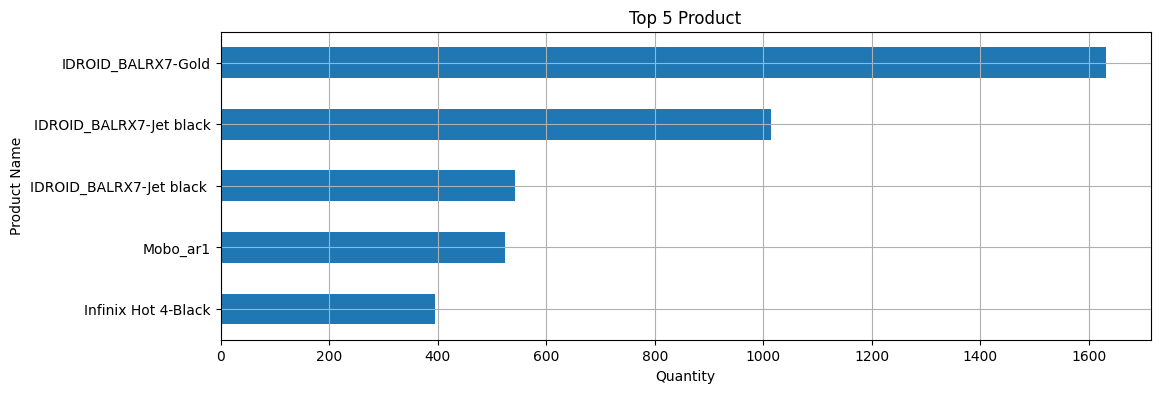

In [51]:
data1.sort_values(
                  by=['qty_2022'],
                  ascending=True,
                  inplace=True
                  )


data1.plot(
    kind="barh",
    x='sku_name',
    y='qty_2022',
    grid=True,
    xlabel="Quantity",
    ylabel="Product Name",
    title="Top 5 Product",
    figsize=(12,4),
    legend=False
    )

The top 5 products sold in the Mobiles & Tablets category in 2022 are:
1. IDROID_BALRX7-Gold with 16321 units sold.
2. IDROID_BALRX7-Jet black with 10142 sold.
3. IDROID_BALRX7-Jet black with 5423 units sold.
4. Mobo_ar1 with 5244 units sold.
5. Infinix Hot 4-Black with 396 units sold.

---

### Numbers 2 & 3
**Dear Data Analyst**,
<br></br>
Following up on a joint meeting of the Werehouse Team and Marketing Team, we found that there was still a lot of product stock available in the Beauty & Grooming Category at the end of 2022.
1. We ask for help in checking the sales data for this category with sales quantity for 2021. Our temporary estimate is that there will be a decrease in sales quantity in 2022 compared to 2021. (Please also display data for the 15 categories)
<br></br>
2. If there is indeed a decline in sales quantity in the Beauty & Grooming category, we ask for help in providing data on the TOP 20 product names that will experience the highest decline in 2022 when compared to 2021. We will use this as discussion material at the next meeting.

Please help to send the data no later than 4 days from today. For the assistance provided, we thank you.
<br></br>
Regards

**Werehouse Team**

### Number 2

In [52]:
data2 = pd.DataFrame(
                     df[(df['is_valid']==1) &
                        ((df['order_date'] >= '2021-01-01') & (df['order_date'] <= '2021-12-31'))]
                     .groupby(by=["category"])["qty_ordered"]
                     .sum()
                     .sort_values(ascending=True)
                     .reset_index(name='qty_2021')
                     )

data2

,category,qty_2021
0,Books,454
1,School & Education,1101
2,Entertainment,1502
3,Computing,2418
4,Kids & Baby,2971
5,Health & Sports,3607
6,Others,4017
7,Home & Living,4408
8,Superstore,5274
9,Appliances,5947


In [53]:
data3 = pd.DataFrame(
                     df[(df['is_valid']==1) &
                        ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))]
                     .groupby(by=["category"])["qty_ordered"]
                     .sum()
                     .sort_values(ascending=True)
                     .reset_index(name='qty_2022')
                     )

data3

,category,qty_2022
0,Books,691
1,School & Education,1165
2,Computing,2251
3,Entertainment,2336
4,Others,2594
5,Health & Sports,4039
6,Kids & Baby,5437
7,Appliances,5651
8,Home & Living,5986
9,Beauty & Grooming,8005


In [54]:
data4 = data2.merge(data3, left_on = 'category', right_on = 'category')

data4

,category,qty_2021,qty_2022
0,Books,454,691
1,School & Education,1101,1165
2,Entertainment,1502,2336
3,Computing,2418,2251
4,Kids & Baby,2971,5437
5,Health & Sports,3607,4039
6,Others,4017,2594
7,Home & Living,4408,5986
8,Superstore,5274,27905
9,Appliances,5947,5651


In [55]:
#Growth = tahun terakhir - tahun sebelumnya
data4['qty_growth']=data4['qty_2022']-data4['qty_2021']
data4.sort_values(by=['qty_growth'],ascending=True,inplace=True)

data4 

,category,qty_2021,qty_2022,qty_growth
13,Soghaat,16523,11491,-5032
11,Beauty & Grooming,11987,8005,-3982
6,Others,4017,2594,-1423
14,Men Fashion,22304,21904,-400
9,Appliances,5947,5651,-296
3,Computing,2418,2251,-167
1,School & Education,1101,1165,64
0,Books,454,691,237
5,Health & Sports,3607,4039,432
2,Entertainment,1502,2336,834


After analyzing the data, it becomes evident that the Beauty & Grooming category has experienced a noticeable decrease in the number of items sold.
Now let’s see the top 20 products that experienced the highest decline in 2022 compared to 2021.

### Number 3

In [19]:
data5 = pd.DataFrame(
                     df[(df['is_valid']==1) &
                        (df['category']=='Beauty & Grooming') &
                        ((df['order_date'] >= '2021-01-01') & (df['order_date'] <= '2021-12-31'))]
                     .groupby(by=["sku_name"])["qty_ordered"]
                     .sum()
                     .sort_values(ascending=False)
                     .reset_index(name='qty_bg_2021')
                     )

data5

,sku_name,qty_bg_2021
0,kcc_krone deal,1583
1,kcc_glamour deal,535
2,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,268
3,emart_Nova Straightener + Curler,245
4,kcc_blaze,239
...,...,...
1304,TO_066-2 IN 1 MAKE UP BRUSH,1
1305,TO_073-The Balm Cosmetics Mary-Lou Manizer,1
1306,TO_080-BUNDLE DEAL CONTOUR & BLENDER,1
1307,TO_083-PACK OF 2 ADS EYELINER GEL,1


In [20]:
data6 = pd.DataFrame(
                     df[(df['is_valid']==1) &
                        (df['category']=='Beauty & Grooming') &
                        ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))]
                     .groupby(by=["sku_name"])["qty_ordered"]
                     .sum()
                     .sort_values(ascending=False)
                     .reset_index(name='qty_bg_2022')
                     )

data6

,sku_name,qty_bg_2022
0,kcc_krone deal,448
1,kcc_glamour deal,175
2,un_Beauty Care Bundle_BC,103
3,BO_All-In-One Manicure Set,100
4,nabila_Nchant FOR Olive,90
...,...,...
1807,SFEVER_CH369HB0EHEHSNAFAMZ,1
1808,SFEVER_CH813HB0FO4AWNAFAMZ,1
1809,SFEVER_CH813HB0G7EO4NAFAMZ,1
1810,SFEVER_CH813HB0U0NZCNAFAMZ,1


In [21]:
#mergering the data
data7 = data5.merge(data6, left_on = 'sku_name', right_on = 'sku_name')
data7['qty_bg_growth']=data7['qty_bg_2022']-data7['qty_bg_2021']
data7.sort_values(by=['qty_bg_growth'],ascending=True,inplace=True)
data7 = data7.head(20)


data7

,sku_name,qty_bg_2021,qty_bg_2022,qty_bg_growth
0,kcc_krone deal,1583,448,-1135
1,kcc_glamour deal,535,175,-360
2,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,268,2,-266
4,kcc_blaze,239,4,-235
5,emart_Ding Ling Trimmer rf 608,214,2,-212
3,emart_Nova Straightener + Curler,245,35,-210
7,kcc_jazzy,208,47,-161
6,itter_AB 1211,213,77,-136
9,Bold_Fresh,135,9,-126
8,Bold_Active,135,11,-124


---

### Number 4
**Dear Data Analyst**,
<br></br>
Regarding the company's anniversary in the next 2 months, the Digital Marketing Team will provide promotional information for customers at the end of this month. The customer criteria we will need are those who have checked out but have not made a payment (is_gross = 1) during 2022. The data we need is Customer ID and Registered Date.

Please help, to send this data before the end of this month to the Digital Marketing Team. For the assistance provided, we thank you.
<br></br>
Regards

**Digital Marketing Team**

In [22]:
data8 = df[
            (df['is_gross']==1) &
            (df['is_valid']==0) &
            (df['is_net']==0) &
            ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))
            ]

data8.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
276,ODR3752452906s,C996508L,2022-04-01,P824901,980142,1,980142,58000,922142,1,0,0,4,Payaxis,Infinix-Hot-S-Grey,980142,646874,Mobiles & Tablets,2021-07-10
279,ODR8094598392d,C996508L,2022-06-01,P691892,730742,1,730742,0,730742,1,0,0,1,cod,Infinix Hot 4-Black,730742,533426,Mobiles & Tablets,2021-07-10
280,ODR8094598392d,C996508L,2022-06-01,P691892,730742,1,730742,0,730742,1,0,0,1,cod,Infinix Hot 4-Black,730742,533426,Mobiles & Tablets,2021-07-10
286,ODR4250096249c,C996508L,2022-01-31,P313303,550942,1,550942,0,550942,1,0,0,4,Payaxis,IDROID_BALRX7-Gold,550942,484822,Mobiles & Tablets,2021-07-10
294,ODR3287872934i,C996508L,2022-08-02,P313303,550942,1,550942,0,550942,1,0,0,4,Payaxis,IDROID_BALRX7-Gold,550942,484822,Mobiles & Tablets,2021-07-10


In [23]:
data9 = data8[['customer_id','registered_date']]

data9

,customer_id,registered_date
276,C996508L,2021-07-10
279,C996508L,2021-07-10
280,C996508L,2021-07-10
286,C996508L,2021-07-10
294,C996508L,2021-07-10
...,...,...
287243,C125653L,2022-08-09
287245,C173391L,2022-08-26
287246,C173393L,2022-08-03
287247,C173393L,2022-08-03


In [24]:
data9.to_csv('audience_list.csv')

---

### Numbers 5 & 6
**Dear Data Analyst**,
<br></br>
Next month we will make an Annual Report which we will submit to Investors, regarding this matter please provide the following data:
1. Overall Profit Growth (%) in 2021 vs 2022 as a result of annual sales performance.
<br></br>
2. Profit Growth (%) based on product category in 2021 vs 2022.

Please help to send the data no later than tomorrow. For the assistance provided, we thank you.
<br></br>
Regards

**Board of Directors (BOD)**

### Number 5

In [61]:
#Calculating Profit
df['profit'] = df['after_discount'] - (df['cogs'] * df['qty_ordered'])

In [62]:
data10 = df[
            (df['is_valid']==1) &
            ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))
            ]

In [63]:
data11 = df[
            (df['is_valid']==1) &
            ((df['order_date'] >= '2021-01-01') & (df['order_date'] <= '2021-12-31'))
            ]

In [64]:
data12 = {
    'Periode Profit': 'Total',
    '2021': data11['profit'].sum(),
    '2022': data10['profit'].sum(),
    'Growth (Value)': data10['profit'].sum() - data11['profit'].sum(),
    'Growth': pd.Series(round(((data10['profit'].sum() - data11['profit'].sum()) / data11['profit'].sum()) * 100, 2), dtype=str) + '%'
}
pd.DataFrame(data=data12, index=[0])

,Periode Profit,2021,2022,Growth (Value),Growth
0,Total,2670490791,3322770995,652280204,24.43%


This means that the company’s profit grew by 24.43% in 2022 compared to 2021. This is an increase, and it suggests that the company is doing well.
As evidenced by the 24.43% increase in total profit during the specified period. now we can observe the growth in each category in profitability in 2022 compared to 2021.

### Number 6

In [65]:
data13 = pd.DataFrame(data10
                     .groupby(by="category")["profit"].sum()
                     .sort_values(ascending=False)
                     .reset_index(name='profit_2022')
                     )

data13

,category,profit_2022
0,Mobiles & Tablets,1652331813
1,Appliances,431194364
2,Women Fashion,345456009
3,Entertainment,265278418
4,Men Fashion,182532305
5,Computing,117410987
6,Beauty & Grooming,75062298
7,Superstore,71088733
8,Home & Living,59669684
9,Health & Sports,47521457


In [66]:
data14 = pd.DataFrame(data11
                     .groupby(by="category")["profit"].sum()\
                     .sort_values(ascending=False)\
                     .reset_index(name='profit_2021')
                     )

data14

,category,profit_2021
0,Mobiles & Tablets,1396876667
1,Appliances,355859467
2,Men Fashion,226619440
3,Entertainment,185811715
4,Women Fashion,129540444
5,Computing,81856228
6,Beauty & Grooming,70581738
7,Home & Living,55279026
8,Soghaat,44221318
9,Health & Sports,40444993


In [67]:
data15 = data14.merge(data13, left_on = 'category', right_on = 'category')
data15

,category,profit_2021,profit_2022
0,Mobiles & Tablets,1396876667,1652331813
1,Appliances,355859467,431194364
2,Men Fashion,226619440,182532305
3,Entertainment,185811715,265278418
4,Women Fashion,129540444,345456009
5,Computing,81856228,117410987
6,Beauty & Grooming,70581738,75062298
7,Home & Living,55279026,59669684
8,Soghaat,44221318,31300117
9,Health & Sports,40444993,47521457


In [68]:
data15['Growth (Value)'] = data15['profit_2022']-data15['profit_2021']
data15['Growth (%)'] = round(data15['Growth (Value)']/data15['profit_2021']*100,2)
data15.sort_values(by=['Growth (%)'], ascending = False, inplace = True)

data15

,category,profit_2021,profit_2022,Growth (Value),Growth (%)
4,Women Fashion,129540444,345456009,215915565,166.68
10,Superstore,28865817,71088733,42222916,146.27
5,Computing,81856228,117410987,35554759,43.44
3,Entertainment,185811715,265278418,79466703,42.77
1,Appliances,355859467,431194364,75334897,21.17
0,Mobiles & Tablets,1396876667,1652331813,255455146,18.29
9,Health & Sports,40444993,47521457,7076464,17.50
13,School & Education,7210265,7934794,724529,10.05
7,Home & Living,55279026,59669684,4390658,7.94
6,Beauty & Grooming,70581738,75062298,4480560,6.35


<Axes: title={'center': ' Growth 2021 vs 2022'}, xlabel='Category', ylabel='Growth (%)'>

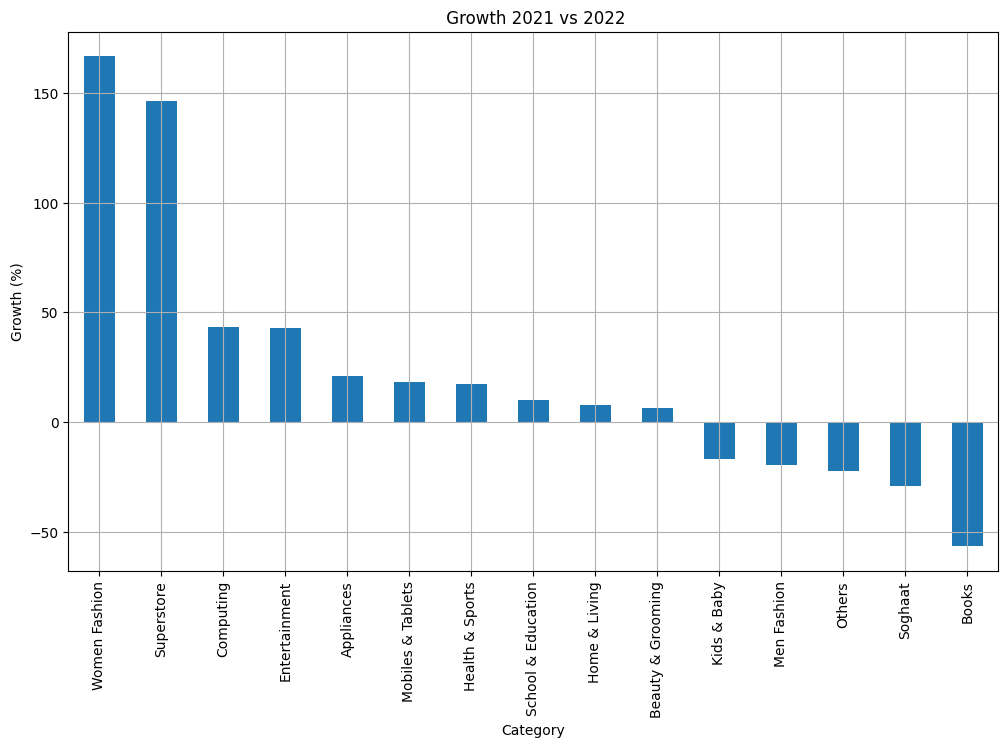

In [69]:
data15.plot(
    kind="bar",
    x='category',
    y='Growth (%)',
    xlabel="Category",
    ylabel="Growth (%)",
    title=" Growth 2021 vs 2022",
    figsize=(12,7),
    rot=90,
    grid=True,
    legend=False
)

From this chart, we can see that the Women Fashion and Superstore category is experiencing noticeable growth. While Books, Soghaat, Others, Men Fashion, and Kids & Baby categories are experiencing decreased growth.

---

### Numbers 7 & 8
**Dear Data Analyst**,
<br></br>
From October to December 2022, we will carry out campaigns every Saturday and Sunday. We want to assess whether the campaign has had enough impact on increasing sales (before_discount). Please help to display data:
1. Average daily weekend sales (Saturday and Sunday) vs average daily weekday sales (Monday-Friday) per month. Is there an increase in sales in each of these months?
2. Average daily weekend sales (Saturday and Sunday) vs average daily weekday sales (Monday-Friday) for the entire 3 months.

Please help to send the data no later than next week. For the assistance provided, we thank you.
<br></br>
Regards

**Campaign Team**

### Number 7

In [70]:
#Membuat kolom tambahan untuk day, month, month_num
df['day']=df['order_date'].dt.day_name()
df['month']=df['order_date'].dt.month_name()
df['month_num']=df['order_date'].dt.month

df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,payment_method,sku_name,base_price,cogs,category,registered_date,profit,day,month,month_num
0,ODR8723933690j,C269125L,2021-01-07,P268025,113100,1,113100,0,113100,1,...,cod,kreations_YI 06-L,113100,92742,Women Fashion,2021-07-16,20358,Thursday,January,1
1,ODR4598875560c,C693630L,2021-01-07,P767128,13920,1,13920,0,13920,1,...,cod,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,13920,10266,Beauty & Grooming,2021-07-15,3654,Thursday,January,1
2,ODR8911603924d,C693630L,2021-11-25,P512707,15660,1,15660,0,15660,1,...,jazzvoucher,RS_Habshi Halwa Tin,15660,12992,Soghaat,2021-07-15,2668,Thursday,November,11
3,ODR9378341541o,C226141L,2021-01-07,P238882,142100,1,142100,0,142100,1,...,cod,Ego_UP0017-999-MR0,142100,85260,Women Fashion,2021-07-28,56840,Thursday,January,1
4,ODR1386982371d,C226141L,2022-05-19,P206879,30740,1,30740,0,30740,1,...,cod,BT_BT-422,30740,26738,Men Fashion,2021-07-28,4002,Thursday,May,5


In [71]:
data16 = pd.DataFrame(
                     df[(df['is_valid']==1) \
                        & (df['day'].isin(['Saturday','Sunday']))\
                        & (df['order_date'] >= '2022-10-01') & (df['order_date'] <= '2022-12-31')]\
                     .groupby(by=["month_num","month"])["before_discount"].mean()\
                     .round()\
                     .sort_values(ascending=False)\
                     .reset_index(name='avg_profit_weekend')
                     )

data16

,month_num,month,avg_profit_weekend
0,12,December,168817.0
1,11,November,138973.0
2,10,October,124681.0


In [72]:
data17 = pd.DataFrame(
                     df[(df['is_valid']==1) \
                        & (df['day'].isin(['Monday','Tuesday','Wednesday','Thusday','Friday']))\
                        & (df['order_date'] >= '2022-10-01') & (df['order_date'] <= '2022-12-31')]\
                     .groupby(by=["month_num","month"])["before_discount"].mean()\
                     .sort_values(ascending=False)\
                     .round()\
                     .reset_index(name='avg_profit_weekdays')
                     )

data17

,month_num,month,avg_profit_weekdays
0,10,October,168393.0
1,11,November,154603.0
2,12,December,112494.0


In [73]:
data18 = data16.merge(data17, left_on = 'month', right_on = 'month')
data18.sort_values(by='month_num_x',ascending=True, inplace=True)
data18 = data18[["month","avg_profit_weekend","avg_profit_weekdays"]]

data18

,month,avg_profit_weekend,avg_profit_weekdays
2,October,124681.0,168393.0
1,November,138973.0,154603.0
0,December,168817.0,112494.0


<Axes: xlabel='Month', ylabel='Total'>

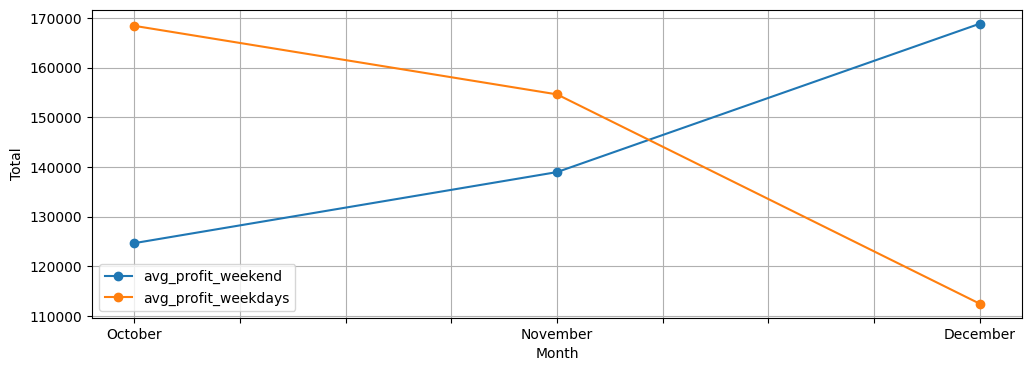

In [74]:
data18.plot(
    kind="line",
    x="month",
    y=["avg_profit_weekend", "avg_profit_weekdays"],
    xlabel="Month",
    ylabel="Total",
    marker="o",
    grid=True,
    figsize=(12,4),
)

From this chart, the average profit on the weekend is experiencing an increase every month, while the average profit on the weekday is experiencing a decrease.

### Number 8

In [75]:
data19 = df[
            (df['is_valid']==1) &
            (df['day'].isin(['Saturday','Sunday'])) &
            ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))
            ]

In [76]:
data20 = df[
            (df['is_valid']==1) &
            (df['day'].isin(['Monday','Tuesday','Wednesday','Thusday','Friday'])) &
            ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))
            ]

In [79]:
data21 = {
          'Periode':'Total 3 months',
          'Avg Weekend Sales': round(data19['before_discount'].mean(),2),
          'Avg Weekdays Sales': round(data20['before_discount'].mean(),2),
          'Diff (Value)': round(data19['before_discount'].mean() - data20['before_discount'].mean(),2),
          'Diff (%)': pd.Series(round(((data19['before_discount'].mean() - data20['before_discount'].mean())/data19['before_discount'].mean())*100,2), dtype=str)+'%'
          }

pd.DataFrame(data=data21, index=[0])

,Periode,Avg Weekend Sales,Avg Weekdays Sales,Diff (Value),Diff (%)
0,Total 3 months,165532.4,174606.28,-9073.88,-5.48%


- The average sales on weekends is 165532.4, while the average sales on weekdays is 174606.28
- The difference in sales between weekends and weekdays is -9073.88
- The percentage difference in sales between weekends and weekdays is -5.48%

---

### Numbers 9 & 10
**Dear Data Analyst**,
<br></br>
In order to know customers' purchasing power, we need data:
1. AOV (Average Order Value or Total sales / Total Order) every month during 2021 vs 2022.

2. AOV in 2021 vs 2022.

For the assistance provided, we thank you
<br></br>
Regards

**Campaign Team**

### Number 9

In [80]:
data22 = pd.DataFrame(
                df[(df['is_valid']==1) & ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))]
                .groupby(by=['month_num','month'])["after_discount"]
                .sum()
                .round()
                .reset_index(name='sales_2022')
                .sort_values(by=['month_num'],ascending=True)
                )

data22

,month_num,month,sales_2022
0,1,January,1545218206
1,2,February,1506270759
2,3,March,2263980593
3,4,April,2117794145
4,5,May,3340913475
5,6,June,1295185399
6,7,July,1703870406
7,8,August,695291256
8,9,September,1537627843
9,10,October,475515141


In [88]:
data23 = pd.DataFrame(
                df[(df['is_valid']==1) & ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))]
                .groupby(by=['month_num','month'])["id"]
                .nunique()
                .round()
                .reset_index(name='order_2022')
                .sort_values(by=['month_num'],ascending=True)
                )

data23

,month_num,month,order_2022
0,1,January,4799
1,2,February,4790
2,3,March,6922
3,4,April,6348
4,5,May,9037
5,6,June,5219
6,7,July,6278
7,8,August,2412
8,9,September,1692
9,10,October,1772


In [89]:
data24 = pd.DataFrame(
                df[(df['is_valid']==1) & ((df['order_date'] >= '2021-01-01') & (df['order_date'] <= '2021-12-31'))]
                .groupby(by=['month_num','month'])["after_discount"]
                .sum()
                .round()
                .reset_index(name='sales_2021')
                .sort_values(by=['month_num'],ascending=True)
                )

data24

,month_num,month,sales_2021
0,1,January,387831154
1,2,February,269133278
2,3,March,277609834
3,4,April,248972305
4,5,May,274319552
5,6,June,292988281
6,7,July,1071236671
7,8,August,1281443842
8,9,September,1617193292
9,10,October,1440524193


In [91]:
data25 = pd.DataFrame(
                df[(df['is_valid']==1) & ((df['order_date'] >= '2021-01-01') & (df['order_date'] <= '2021-12-31'))]\
                .groupby(by=['month_num','month'])["id"]
                .nunique()
                .round()
                .reset_index(name='order_2021')
                .sort_values(by=['month_num'],ascending=True)
                )

data25

,month_num,month,order_2021
0,1,January,1331
1,2,February,1119
2,3,March,1101
3,4,April,1080
4,5,May,992
5,6,June,974
6,7,July,3132
7,8,August,4019
8,9,September,5282
9,10,October,4428


In [92]:
from sqlite3 import connect
conn = connect(':memory:')
data22.to_sql('sales_2022', conn, index=False, if_exists='replace')
data23.to_sql('order_2022', conn, index=False, if_exists='replace')
data24.to_sql('sales_2021', conn, index=False, if_exists='replace')
data25.to_sql('order_2021', conn, index=False, if_exists='replace')

12

In [93]:
data26 = pd.read_sql("""
SELECT 
    sales_2021.*,
    order_2021.order_2021,
    sales_2022.sales_2022,
    order_2022.order_2022
FROM sales_2022
LEFT JOIN order_2022
    on order_2022.month_num = sales_2022.month_num
LEFT JOIN sales_2021
    on sales_2021.month_num = sales_2022.month_num
LEFT JOIN order_2021
    on order_2021.month_num = sales_2022.month_num
""", conn)

data26

,month_num,month,sales_2021,order_2021,sales_2022,order_2022
0,1,January,387831154,1331,1545218206,4799
1,2,February,269133278,1119,1506270759,4790
2,3,March,277609834,1101,2263980593,6922
3,4,April,248972305,1080,2117794145,6348
4,5,May,274319552,992,3340913475,9037
5,6,June,292988281,974,1295185399,5219
6,7,July,1071236671,3132,1703870406,6278
7,8,August,1281443842,4019,695291256,2412
8,9,September,1617193292,5282,1537627843,1692
9,10,October,1440524193,4428,475515141,1772


In [94]:
data26['AOV 2021'] = round(data26['sales_2021']/data26['order_2021'],2)
data26['AOV 2022'] = round(data26['sales_2022']/data26['order_2022'],2)
data26['Diff AOV (value)']= data26['AOV 2022']-data26['AOV 2021']
data26['Diff AOV (%)'] = round((data26['AOV 2022']-data26['AOV 2021'])/data26['AOV 2021']*100,2)
data26

,month_num,month,sales_2021,order_2021,sales_2022,order_2022,AOV 2021,AOV 2022,Diff AOV (value),Diff AOV (%)
0,1,January,387831154,1331,1545218206,4799,291383.29,321987.54,30604.25,10.50
1,2,February,269133278,1119,1506270759,4790,240512.31,314461.54,73949.23,30.75
2,3,March,277609834,1101,2263980593,6922,252143.36,327070.30,74926.94,29.72
3,4,April,248972305,1080,2117794145,6348,230529.91,333615.96,103086.05,44.72
4,5,May,274319552,992,3340913475,9037,276531.81,369692.76,93160.95,33.69
5,6,June,292988281,974,1295185399,5219,300809.32,248167.35,-52641.97,-17.50
6,7,July,1071236671,3132,1703870406,6278,342029.59,271403.38,-70626.21,-20.65
7,8,August,1281443842,4019,695291256,2412,318846.44,288263.37,-30583.07,-9.59
8,9,September,1617193292,5282,1537627843,1692,306170.63,908763.50,602592.87,196.82
9,10,October,1440524193,4428,475515141,1772,325321.63,268349.40,-56972.23,-17.51


<Axes: xlabel='Month', ylabel='AOV'>

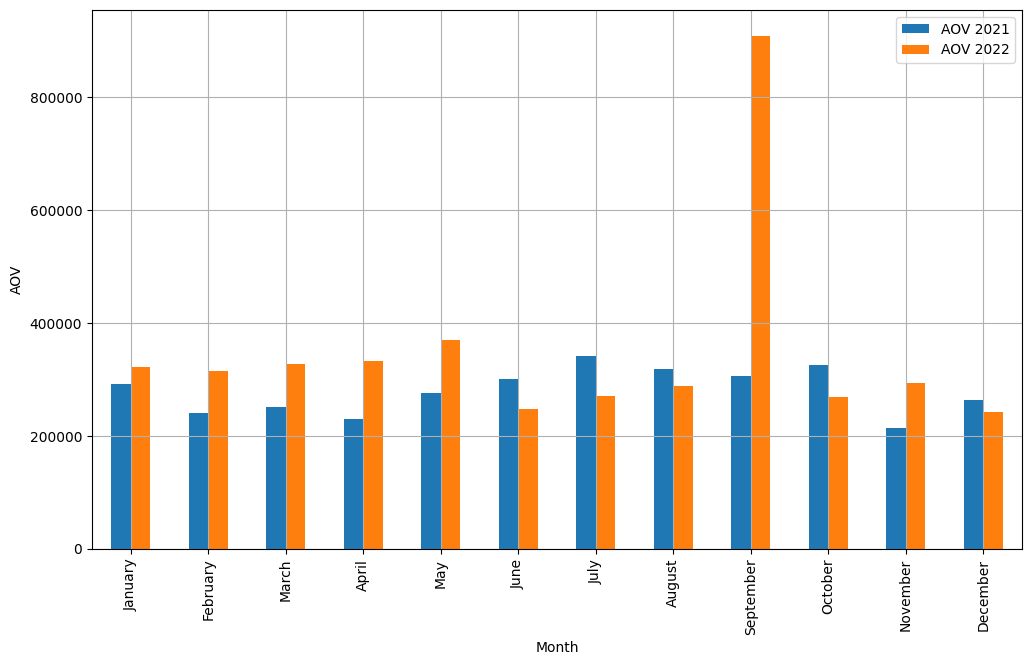

In [95]:
data26.plot(
    x='month',
    y=['AOV 2021','AOV 2022'],
    kind='bar', 
    grid = True,
    xlabel = "Month",
    ylabel = "AOV",
    figsize=(12,7),
    rot=90
    )

The largest difference in AOV between 2021 and 2022 is in September, where the AOV in 2022 is higher than the AOV in 2021

### Number 10

In [96]:
aov_2021 = round(data26['sales_2021'].sum()/data26['order_2021'].sum(),2)
aov_2022 = round(data26['sales_2022'].sum()/data26['order_2022'].sum(),2)
data27 = {
          'Periode':'Total',
          'AOV 2021': aov_2021, 
          'AOV 2022': aov_2022, 
          'Growth (value)': aov_2022-aov_2021,
          'Growth': pd.Series(round((aov_2022-aov_2021)/aov_2021*100,2), dtype=str)+'%'
          }

pd.DataFrame(data=data27, index=[0])

,Periode,AOV 2021,AOV 2022,Growth (value),Growth
0,Total,260769.66,329910.09,69140.43,26.51%


The result is that the average order value (AOV) increased by 69.140 in 2022, which is a growth of 26.51%. This suggests that the company may be doing something right to increase its AOV. They could continue with their current marketing strategies or try new ones to see if they can further increase their AOV.

___